# Analysis like in Norman-Haignere (2015) paper of 29 subjects (group analysis) with matrix (sentencesXvoxels)

written by Manon Pietrantoni
2024

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os
from sklearn.decomposition import PCA, FastICA

c:\Users\manon\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Open the data csv format

file size: 2Go

matrix size: 319*371784 (mask_size computed)

Possible voxels to test : 0 to 371783

In [75]:
sub = 'maths'
if sub == 'ados':
    n_subj = 15
if sub == 'adults':
    n_sub = 14
if sub == 'maths' or sub == 'language':
    n_subj = 29

In [76]:
data = pd.read_csv(f'../results/sub-total_{sub}_matrix_sentencesXvoxels.csv', encoding='utf-8')
#usecols=voxel,

In [77]:
print(data.shape)
voxel = list(range(0,data.shape[1]))
n_sentences = data.shape[0]

(119, 371784)


## Test PCA on the voxels

In [46]:
ncomponents= 20
pca = PCA(n_components= ncomponents)
data_pca = pca.fit_transform(data)
print(data_pca.shape)

(120, 20)


0.18198505617934943


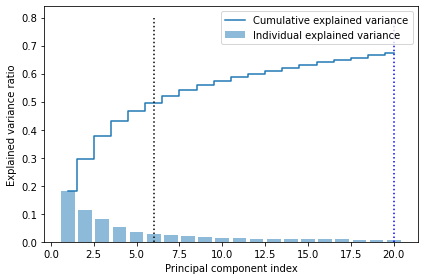

In [47]:
# implement a graph with the explainable variance
#
exp_var_pca = pca.explained_variance_ratio_
print(exp_var_pca[0])
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.vlines(6.0, 0, 0.8, linestyles ="dotted", colors ="k")
plt.vlines(20, 0, 0.8, linestyles ="dotted", colors ="b")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

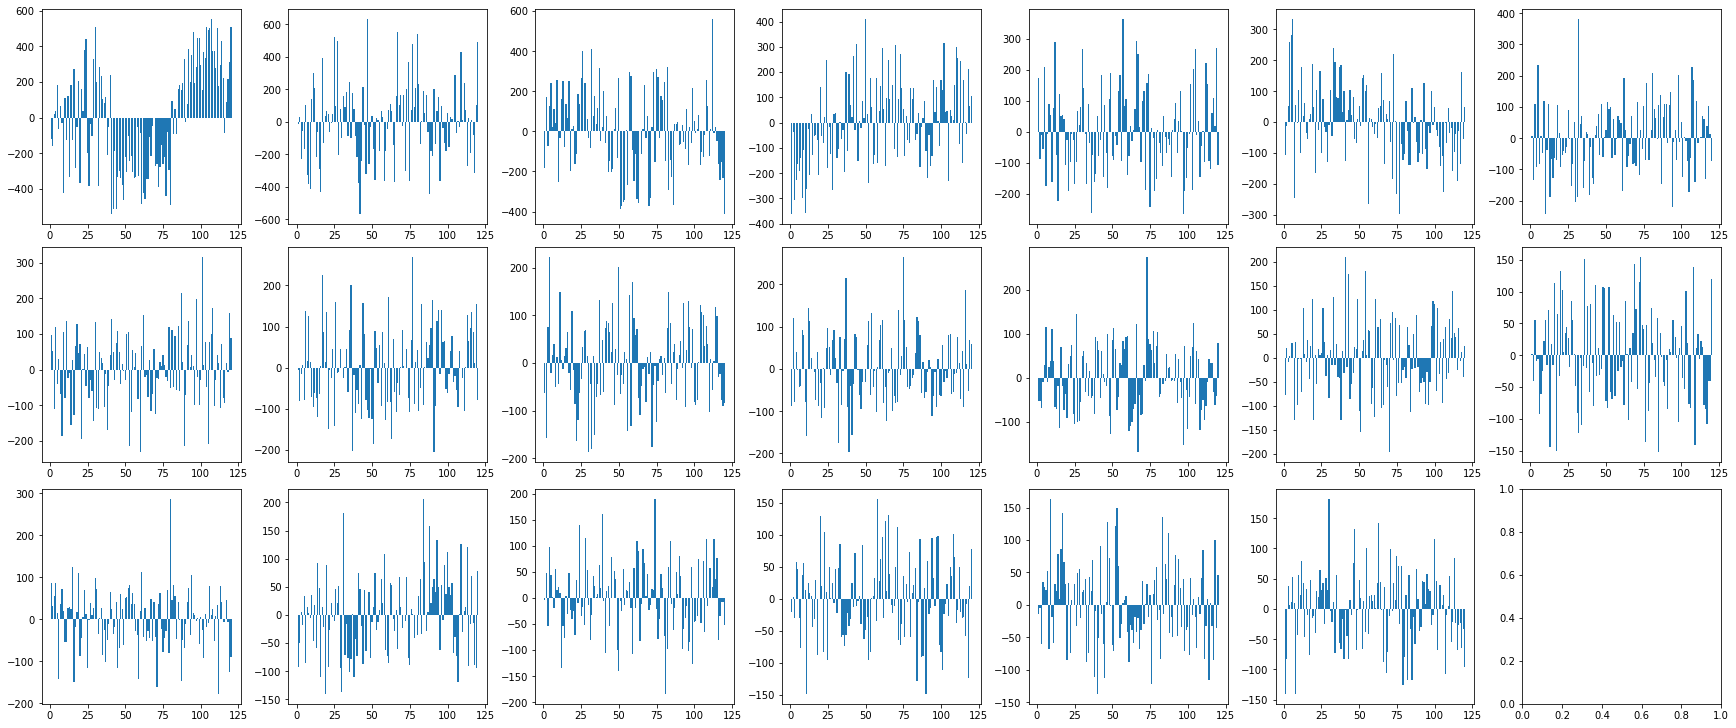

In [48]:
# Plot each component of the PCA

fig, axs = plt.subplots(3, 7, layout='constrained', figsize = (24,10))
names= list(range(1,data.shape[0]+1))
for i in range(0,7):
    axs[0,i].bar(names, data_pca[:,i])
for j in range(7,14):
    axs[1,j-(i+1)].bar(names, data_pca[:,j])
for k in range(14,20):
    axs[2,k-(j+1)].bar(names, data_pca[:,k])
plt.show()


Next, we will sort the values of the PCA from the highest to the lowest value

In [55]:
def sort_values(data_pca):
    index_pca_sorted = np.argsort(data_pca)+1
    for i in range(index_pca_sorted.shape[0]):
        if sub == 'maths':
            if index_pca_sorted[i]>80:
                index_pca_sorted[i] = index_pca_sorted[i] + 160
        if sub == 'language':
            if index_pca_sorted[i]<41:
                index_pca_sorted[i] = index_pca_sorted[i] + 120
            if index_pca_sorted[i]>40 and index_pca_sorted[i]<81:
                index_pca_sorted[i] = index_pca_sorted[i] + 160
            if index_pca_sorted[i]>80 and index_pca_sorted[i]<121:
                index_pca_sorted[i] = index_pca_sorted[i] + 200
        if index_pca_sorted[i]>=265:
            index_pca_sorted[i]=index_pca_sorted[i]+1
    value_pca_sorted = np.sort(data_pca)
    pca_sorted_dict = dict(zip(index_pca_sorted,value_pca_sorted))
    pca_sorted_dict = {str(k):v for k,v in pca_sorted_dict.items()}
    return pca_sorted_dict, index_pca_sorted

In [56]:
pca_sorted_dict_0, index_pca_sorted_0 = sort_values(data_pca[:,0])
pca_sorted_dict_1, index_pca_sorted_1 = sort_values(data_pca[:,1])
pca_sorted_dict_2, index_pca_sorted_2 = sort_values(data_pca[:,2])
pca_sorted_dict_3, index_pca_sorted_3 = sort_values(data_pca[:,3])
pca_sorted_dict_4, index_pca_sorted_4 = sort_values(data_pca[:,4])
pca_sorted_dict_5, index_pca_sorted_5 = sort_values(data_pca[:,5])
#pca_sorted_dict_6, index_pca_sorted_6 = sort_values(data_pca[:,6])
#pca_sorted_dict_7, index_pca_sorted_7 = sort_values(data_pca[:,7])
#pca_sorted_dict_8, index_pca_sorted_8 = sort_values(data_pca[:,8])

Now, we need to make each bar color depends on the category it belongs to

In [57]:
def compute_barplot_parameters(pca_sorted_dict, index_pca_sorted):
    names = pca_sorted_dict.keys()
    values = pca_sorted_dict.values()

    bar_colors =[]
    for i in index_pca_sorted:
        if i> 0 and i < 41 and len(bar_colors)<320:
            bar_colors.append('gold')
        if i> 40 and i < 81:
            bar_colors.append('chocolate')
        if i> 80 and i < 121:
            bar_colors.append('grey')
        if i> 120 and i < 161:
            bar_colors.append('cornflowerblue')
        if i> 160 and i < 201:
            bar_colors.append('lightgrey')
        if i> 200 and i < 241:
            bar_colors.append('darkturquoise')
        if i> 240 and i < 281:
            bar_colors.append('red')
        if i> 280 and i < 321:
            bar_colors.append('mediumblue')
    return names, values, bar_colors

In [58]:
names_0, values_0, bar_colors_0 = compute_barplot_parameters(pca_sorted_dict_0,index_pca_sorted_0)
names_1, values_1, bar_colors_1 = compute_barplot_parameters(pca_sorted_dict_1,index_pca_sorted_1)
names_2, values_2, bar_colors_2 = compute_barplot_parameters(pca_sorted_dict_2,index_pca_sorted_2)
names_3, values_3, bar_colors_3 = compute_barplot_parameters(pca_sorted_dict_3,index_pca_sorted_3)
names_4, values_4, bar_colors_4 = compute_barplot_parameters(pca_sorted_dict_4,index_pca_sorted_4)
names_5, values_5, bar_colors_5 = compute_barplot_parameters(pca_sorted_dict_5,index_pca_sorted_5)
#names_6, values_6, bar_colors_6 = compute_barplot_parameters(pca_sorted_dict_6,index_pca_sorted_6)
#names_7, values_7, bar_colors_7 = compute_barplot_parameters(pca_sorted_dict_7,index_pca_sorted_7)
#names_8, values_8, bar_colors_8 = compute_barplot_parameters(pca_sorted_dict_8,index_pca_sorted_8)

In [59]:
#Compute legend parameters

custom_lines = [Line2D([0], [0], color='lightgrey', lw=4),
                Line2D([0], [0], color='grey', lw=4),
                Line2D([0], [0], color='darkturquoise', lw=4),
                Line2D([0], [0], color='cornflowerblue', lw=4),
                Line2D([0], [0], color='mediumblue', lw=4),
                Line2D([0], [0], color='gold', lw=4),
                Line2D([0], [0], color='chocolate', lw=4),
                Line2D([0], [0], color='red', lw=4),
                ]
bar_labels = ['List of words', 'Meaningless sentences','Factual knowledge','Contextual knowledge','Social knowledge', 'Calculation', 'Arithmetic principles',  'Geometry']


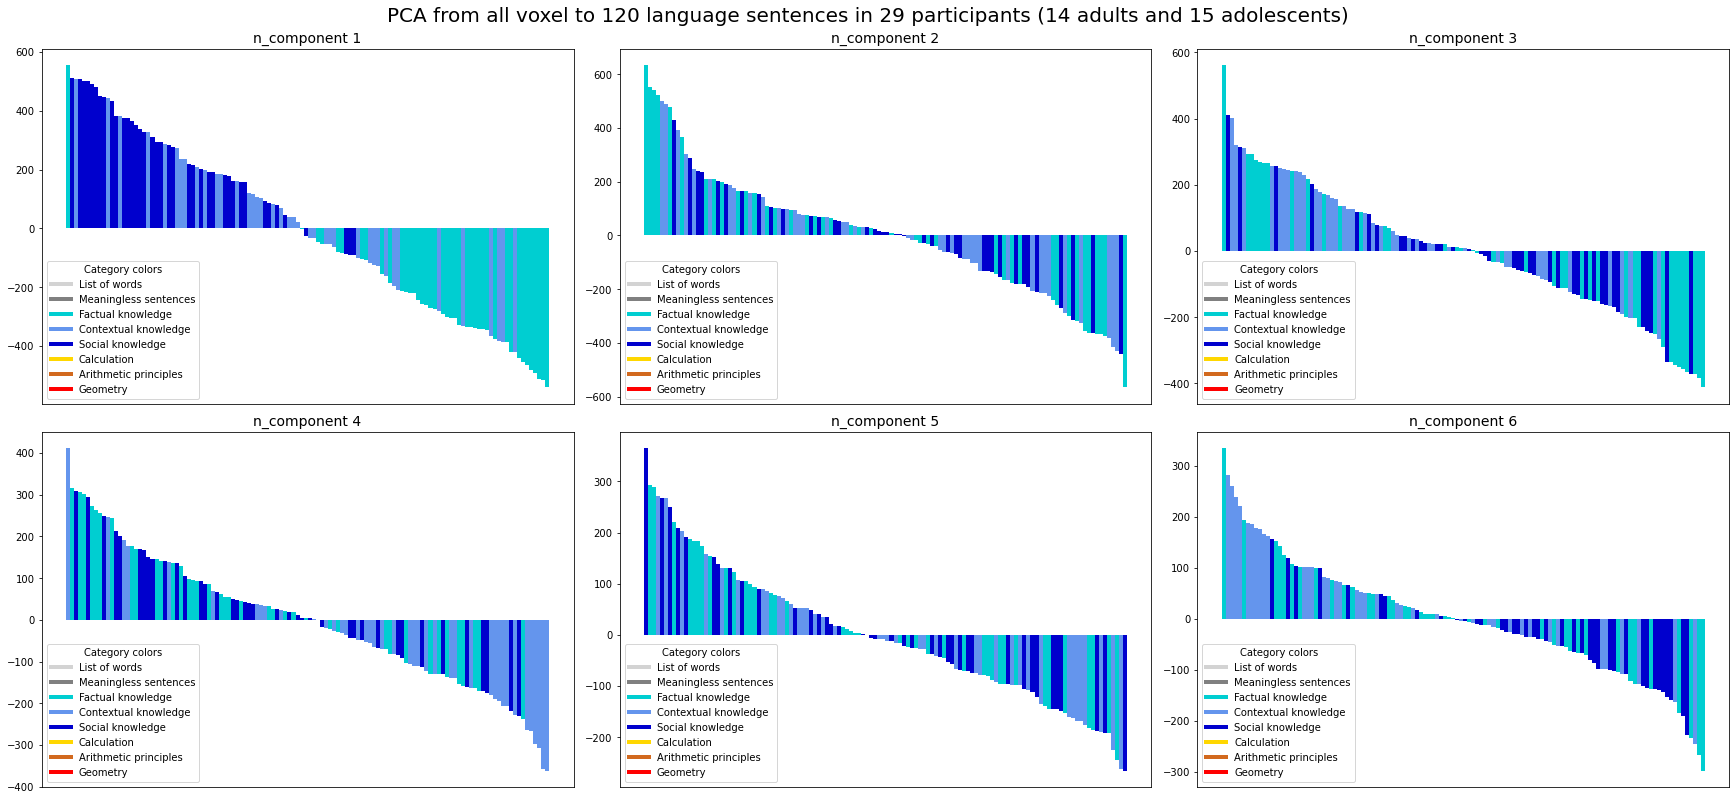

In [60]:
fig, axs = plt.subplots(2, 3, layout='constrained', figsize = (24,11))

axs[0,0].bar(names_0, values_0, color=bar_colors_0, label=bar_labels, width=1)
axs[0,0].set_title('n_component 1', size = 14)
axs[0,0].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,0].invert_xaxis()
axs[0,0].xaxis.set_visible(False)
axs[0,1].bar(names_1, values_1, color=bar_colors_1, label=bar_labels, width=1)
axs[0,1].set_title('n_component 2', size = 14)
axs[0,1].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,1].invert_xaxis()
axs[0,1].xaxis.set_visible(False)
axs[0,2].bar(names_2, values_2, color=bar_colors_2, label=bar_labels, width=1)
axs[0,2].set_title('n_component 3', size = 14)
axs[0,2].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,2].invert_xaxis()
axs[0,2].xaxis.set_visible(False)
axs[1,0].bar(names_3, values_3, color=bar_colors_3, label=bar_labels, width=1)
axs[1,0].set_title('n_component 4', size = 14)
axs[1,0].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[1,0].invert_xaxis()
axs[1,0].xaxis.set_visible(False)
axs[1,1].bar(names_4, values_4, color=bar_colors_4, label=bar_labels, width=1)
axs[1,1].set_title('n_component 5', size = 14)
axs[1,1].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[1,1].invert_xaxis()
axs[1,1].xaxis.set_visible(False)
axs[1,2].bar(names_5, values_5, color=bar_colors_5, label=bar_labels, width=1)
axs[1,2].set_title('n_component 6', size = 14)
axs[1,2].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[1,2].invert_xaxis()
axs[1,2].xaxis.set_visible(False)
#axs[2,0].bar(names_6, values_6, color=bar_colors_6, label=bar_labels, width=1)
#axs[2,0].set_title('n_component 7', size = 14)
#axs[2,0].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
#axs[2,0].invert_xaxis()
#axs[2,0].xaxis.set_visible(False)
#axs[2,1].bar(names_7, values_7, color=bar_colors_7, label=bar_labels, width=1)
#axs[2,1].set_title('n_component 8', size = 14)
#axs[2,1].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
#axs[2,1].invert_xaxis()
#axs[2,1].xaxis.set_visible(False)
#axs[2,2].bar(names_8, values_8, color=bar_colors_8, label=bar_labels, width=1)
#axs[2,2].set_title('n_component 9', size = 14)
#axs[2,2].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
#axs[2,2].invert_xaxis()
#axs[2,2].xaxis.set_visible(False)

fig.suptitle(f'PCA from all voxel to {data.shape[0]} {sub} sentences in 29 participants (14 adults and 15 adolescents)', size =20)
plt.show()

## TEST ICA ON THE VOXELS

Using FastICA coming from Scikit Learn

In [13]:
ica = FastICA(n_components=6)
data_ica = ica.fit_transform(data)
print(data_ica.shape)

(319, 6)


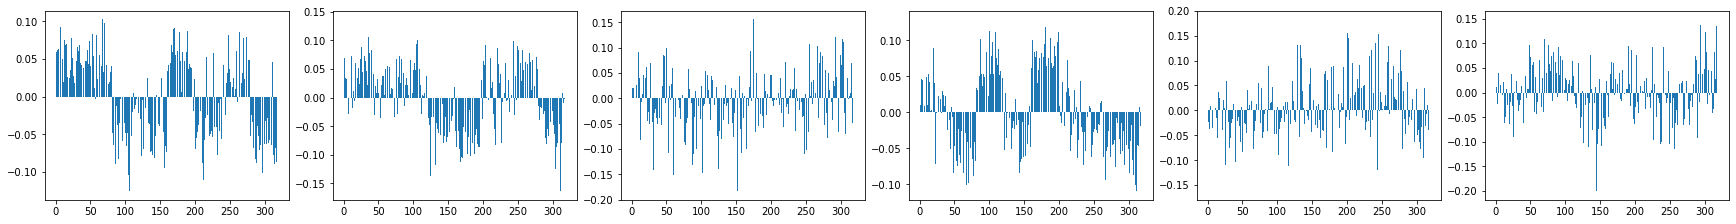

In [14]:
#Plot of the 6 first components from the ICA
fig, axs = plt.subplots(1, 6, layout='constrained', figsize = (24,3))
names= list(range(1,320))
for i in range(0,6):
    axs[i].bar(names, data_ica[:,i])
plt.show()

In [15]:
ica_sorted_dict_0, index_ica_sorted_0 = sort_values(data_ica[:,0])
ica_sorted_dict_1, index_ica_sorted_1 = sort_values(data_ica[:,1])
ica_sorted_dict_2, index_ica_sorted_2 = sort_values(data_ica[:,2])
ica_sorted_dict_3, index_ica_sorted_3 = sort_values(data_ica[:,3])
ica_sorted_dict_4, index_ica_sorted_4 = sort_values(data_ica[:,4])
ica_sorted_dict_5, index_ica_sorted_5 = sort_values(data_ica[:,5])

In [16]:
names_ica_0, values_ica_0, bar_colors_ica_0 = compute_barplot_parameters(ica_sorted_dict_0,index_ica_sorted_0)
names_ica_1, values_ica_1, bar_colors_ica_1 = compute_barplot_parameters(ica_sorted_dict_1,index_ica_sorted_1)
names_ica_2, values_ica_2, bar_colors_ica_2 = compute_barplot_parameters(ica_sorted_dict_2,index_ica_sorted_2)
names_ica_3, values_ica_3, bar_colors_ica_3 = compute_barplot_parameters(ica_sorted_dict_3,index_ica_sorted_3)
names_ica_4, values_ica_4, bar_colors_ica_4 = compute_barplot_parameters(ica_sorted_dict_4,index_ica_sorted_4)
names_ica_5, values_ica_5, bar_colors_ica_5 = compute_barplot_parameters(ica_sorted_dict_5,index_ica_sorted_5)

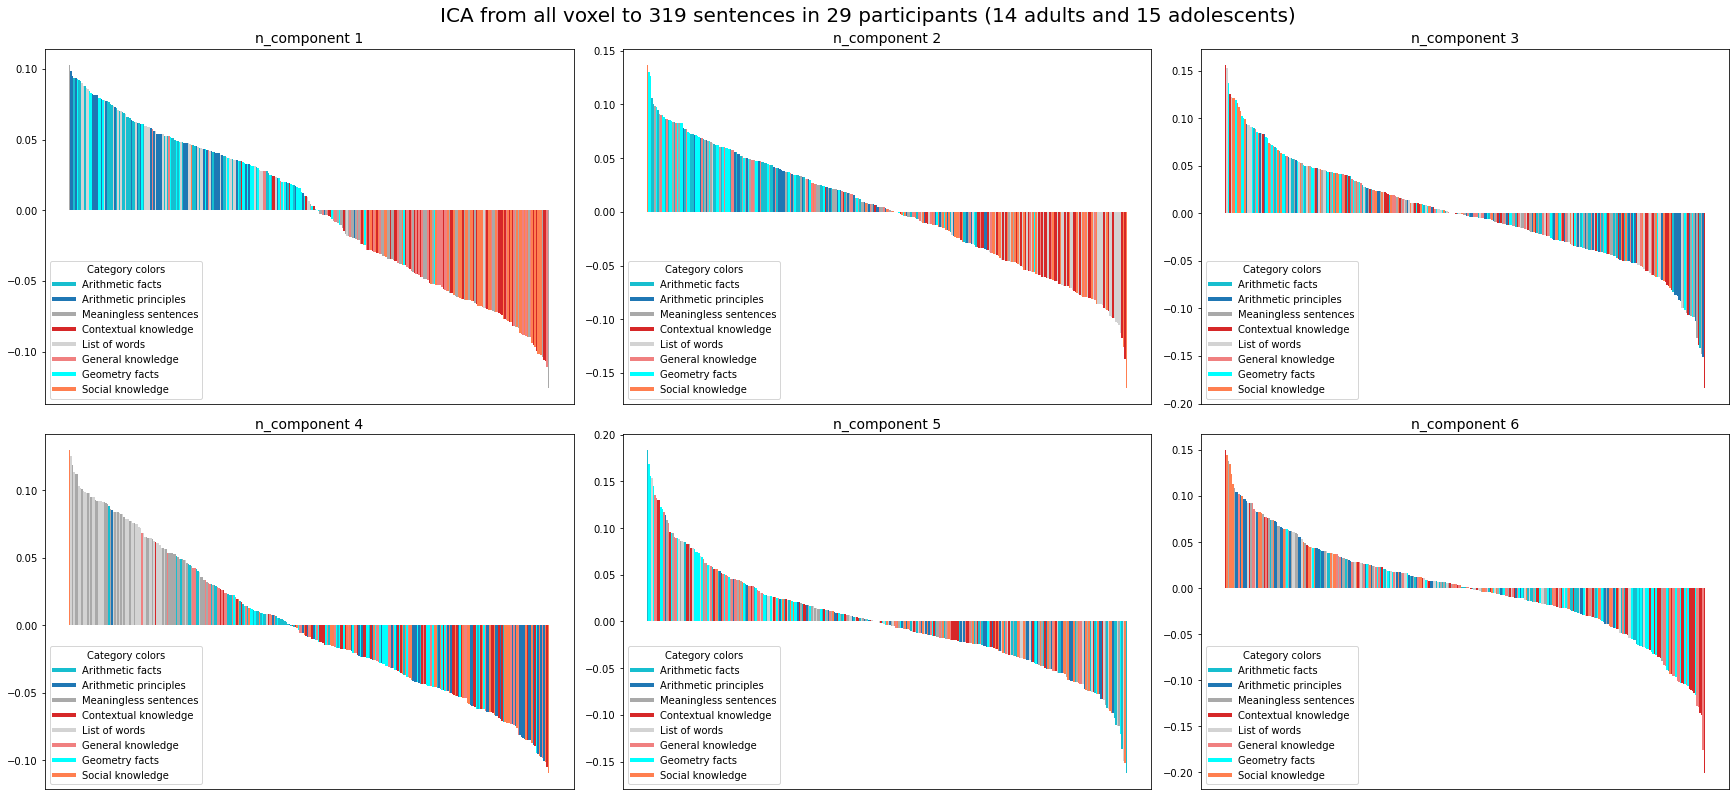

In [17]:
fig, axs = plt.subplots(2, 3, layout='constrained', figsize = (24,11))

axs[0,0].bar(names_ica_0, values_ica_0, color=bar_colors_ica_0, label=bar_labels, width=1)
axs[0,0].set_title('n_component 1', size = 14)
axs[0,0].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,0].invert_xaxis()
axs[0,0].xaxis.set_visible(False)
axs[0,1].bar(names_ica_1, values_ica_1, color=bar_colors_ica_1, label=bar_labels, width=1)
axs[0,1].set_title('n_component 2', size = 14)
axs[0,1].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,1].invert_xaxis()
axs[0,1].xaxis.set_visible(False)
axs[0,2].bar(names_ica_2, values_ica_2, color=bar_colors_ica_2, label=bar_labels, width=1)
axs[0,2].set_title('n_component 3', size = 14)
axs[0,2].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,2].invert_xaxis()
axs[0,2].xaxis.set_visible(False)
axs[1,0].bar(names_ica_3, values_ica_3, color=bar_colors_ica_3, label=bar_labels, width=1)
axs[1,0].set_title('n_component 4', size = 14)
axs[1,0].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[1,0].invert_xaxis()
axs[1,0].xaxis.set_visible(False)
axs[1,1].bar(names_ica_4, values_ica_4, color=bar_colors_ica_4, label=bar_labels, width=1)
axs[1,1].set_title('n_component 5', size = 14)
axs[1,1].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[1,1].invert_xaxis()
axs[1,1].xaxis.set_visible(False)
axs[1,2].bar(names_ica_5, values_ica_5, color=bar_colors_ica_5, label=bar_labels, width=1)
axs[1,2].set_title('n_component 6', size = 14)
axs[1,2].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[1,2].invert_xaxis()
axs[1,2].xaxis.set_visible(False)

fig.suptitle('ICA from all voxel to 319 sentences in 29 participants (14 adults and 15 adolescents)', size =20)
plt.show()

## TEST NON-PARAMETRIC ICA NORMAN-HAIGNERE

Compute the non-parametric ICA as described in Norman-Haignere (2015) paper

In [78]:
data.shape

(119, 371784)

In [79]:
K = 3 # number of components
X=np.array(data.T)
print(X.shape, type(X))

#install npica first
from npica import ICA
N_RANDOM_INITS = 1000
RAND_SEED = 10
ica = ICA(K=K,N_RANDOM_INITS=N_RANDOM_INITS,RAND_SEED=RAND_SEED)
ica.fit(X) #it takes approximately 10 mins to run
print(ica.sources)


(371784, 119) <class 'numpy.ndarray'>
[[ 1.21348893e+00  1.11692573e+00  9.06989274e-01  8.04284907e-01
   1.06856289e+00  9.63949564e-01  5.50179492e-01  1.20168071e+00
   6.93921552e-01  4.46550991e-01  1.00561121e+00  1.68865776e+00
   6.90589118e-01  8.43308007e-01  1.03977192e+00  7.26422782e-01
   1.16254394e+00  4.65166805e-01  9.01477011e-01  7.26359876e-01
   9.45209868e-01  1.14343061e+00  1.20224331e+00  1.34856807e+00
   1.27880647e+00  1.52236850e+00  8.94173553e-01  9.82937615e-01
   1.30659199e+00  1.28615496e+00  1.43406328e+00  1.60590330e+00
   1.06954549e+00  9.51347514e-01  1.55549017e+00  1.54875417e+00
   1.29120682e+00  1.08946246e+00  1.19906486e+00  1.47882804e+00
   4.46160551e-01  6.73864969e-01  9.55954950e-01  5.50277979e-01
   5.71044275e-01  7.21632994e-01  5.77451811e-01  9.03836844e-01
   1.06591598e+00  5.06838679e-01  6.71764698e-01  1.20717418e+00
   5.62282691e-01  8.94121500e-01  1.01858431e+00  8.46806757e-01
   8.26776626e-01  9.44485274e-01  9.9

In [80]:
data_npica = ica.sources.T
print(data_npica.shape)

(119, 3)


IndexError: index 3 is out of bounds for axis 1 with size 3

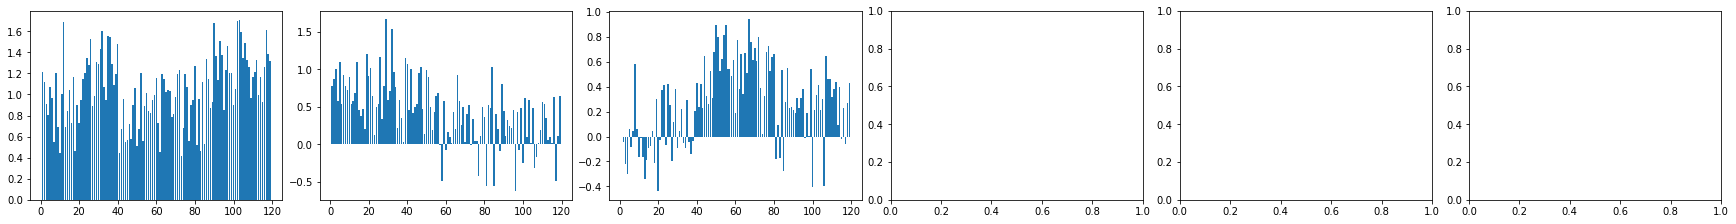

In [81]:
# Plot of the 6 first components of the npICA
fig, axs = plt.subplots(1, 6, layout='constrained', figsize = (24,3))
names= list(range(1,data.shape[0]+1))
for i in range(0,6):
    axs[i].bar(names, data_npica[:,i])
plt.show()

In [82]:
npica_sorted_dict_0, index_npica_sorted_0 = sort_values(data_npica[:,0])
npica_sorted_dict_1, index_npica_sorted_1 = sort_values(data_npica[:,1])
npica_sorted_dict_2, index_npica_sorted_2 = sort_values(data_npica[:,2])
#npica_sorted_dict_3, index_npica_sorted_3 = sort_values(data_npica[:,3])
#npica_sorted_dict_4, index_npica_sorted_4 = sort_values(data_npica[:,4])
#npica_sorted_dict_5, index_npica_sorted_5 = sort_values(data_npica[:,5])

In [83]:
names_npica_0, values_npica_0, bar_colors_npica_0 = compute_barplot_parameters(npica_sorted_dict_0,index_npica_sorted_0)
names_npica_1, values_npica_1, bar_colors_npica_1 = compute_barplot_parameters(npica_sorted_dict_1,index_npica_sorted_1)
names_npica_2, values_npica_2, bar_colors_npica_2 = compute_barplot_parameters(npica_sorted_dict_2,index_npica_sorted_2)
#names_npica_3, values_npica_3, bar_colors_npica_3 = compute_barplot_parameters(npica_sorted_dict_3,index_npica_sorted_3)
#names_npica_4, values_npica_4, bar_colors_npica_4 = compute_barplot_parameters(npica_sorted_dict_4,index_npica_sorted_4)
#names_npica_5, values_npica_5, bar_colors_npica_5 = compute_barplot_parameters(npica_sorted_dict_5,index_npica_sorted_5)

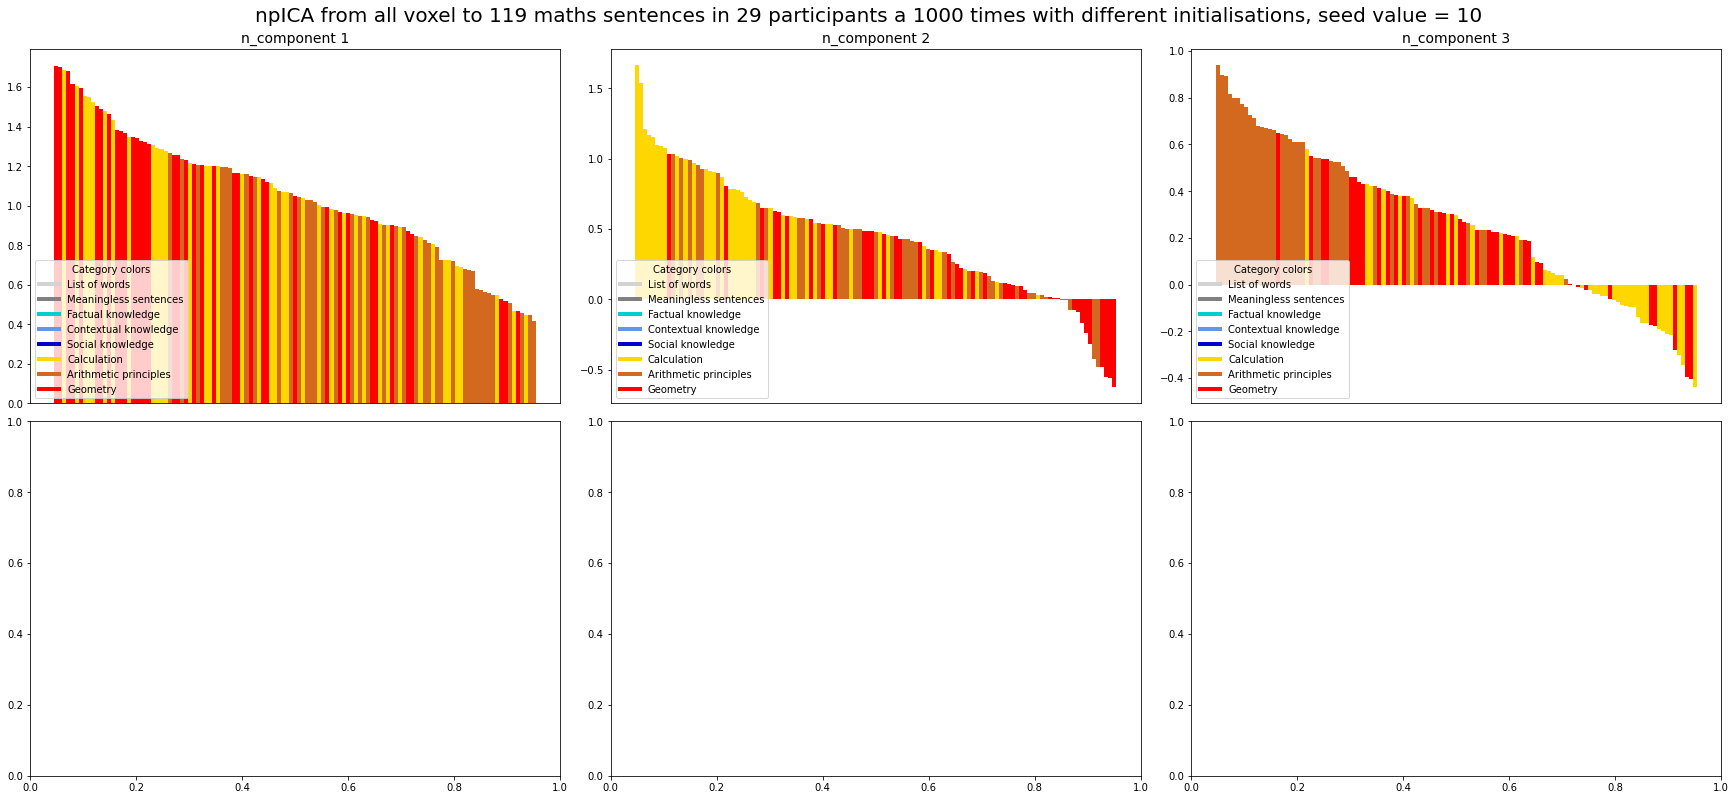

In [84]:
fig, axs = plt.subplots(2, 3, layout='constrained', figsize = (24,11))

axs[0,0].bar(names_npica_0, values_npica_0, color=bar_colors_npica_0, label=bar_labels, width=1)
axs[0,0].set_title('n_component 1', size = 14)
axs[0,0].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,0].invert_xaxis()
axs[0,0].xaxis.set_visible(False)
axs[0,1].bar(names_npica_1, values_npica_1, color=bar_colors_npica_1, label=bar_labels, width=1)
axs[0,1].set_title('n_component 2', size = 14)
axs[0,1].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,1].invert_xaxis()
axs[0,1].xaxis.set_visible(False)
axs[0,2].bar(names_npica_2, values_npica_2, color=bar_colors_npica_2, label=bar_labels, width=1)
axs[0,2].set_title('n_component 3', size = 14)
axs[0,2].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
axs[0,2].invert_xaxis()
axs[0,2].xaxis.set_visible(False)
#axs[1,0].bar(names_npica_3, values_npica_3, color=bar_colors_npica_3, label=bar_labels, width=1)
#axs[1,0].set_title('n_component 4', size = 14)
#axs[1,0].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
#axs[1,0].invert_xaxis()
#axs[1,0].xaxis.set_visible(False)
#axs[1,1].bar(names_npica_4, values_npica_4, color=bar_colors_npica_4, label=bar_labels, width=1)
#axs[1,1].set_title('n_component 5', size = 14)
#axs[1,1].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
#axs[1,1].invert_xaxis()
#axs[1,1].xaxis.set_visible(False)
#axs[1,2].bar(names_npica_5, values_npica_5, color=bar_colors_npica_5, label=bar_labels, width=1)
#axs[1,2].set_title('n_component 6', size = 14)
#axs[1,2].legend(custom_lines, bar_labels, title='Category colors', loc = 3, prop = { "size": 10})
#axs[1,2].invert_xaxis()
#axs[1,2].xaxis.set_visible(False)

fig.suptitle(f'npICA from all voxel to {data.shape[0]} {sub} sentences in 29 participants a {N_RANDOM_INITS} times with different initialisations, seed value = {RAND_SEED}', size =20)
plt.show()